# import libraries

In [35]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os  
import cv2

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import  GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image


# Read the CSV file containing image file paths and labels

In [25]:
data_dir = 'data'
file_paths = []
labels = []
folds = os.listdir(data_dir)
for fold in folds:
    fold_path = os.path.join(data_dir, fold)
    for file in os.listdir(fold_path):
        file_path = os.path.join(fold_path, file)
        file_paths.append(file_path)
        labels.append(fold)
df = pd.DataFrame({'filepaths': file_paths, 'labels': labels})

In [26]:
df.head()

,filepaths,labels
0,data\without_mask\without_mask_1.jpg,without_mask
1,data\without_mask\without_mask_10.jpg,without_mask
2,data\without_mask\without_mask_100.jpg,without_mask
3,data\without_mask\without_mask_1000.jpg,without_mask
4,data\without_mask\without_mask_1001.jpg,without_mask


# show sample images

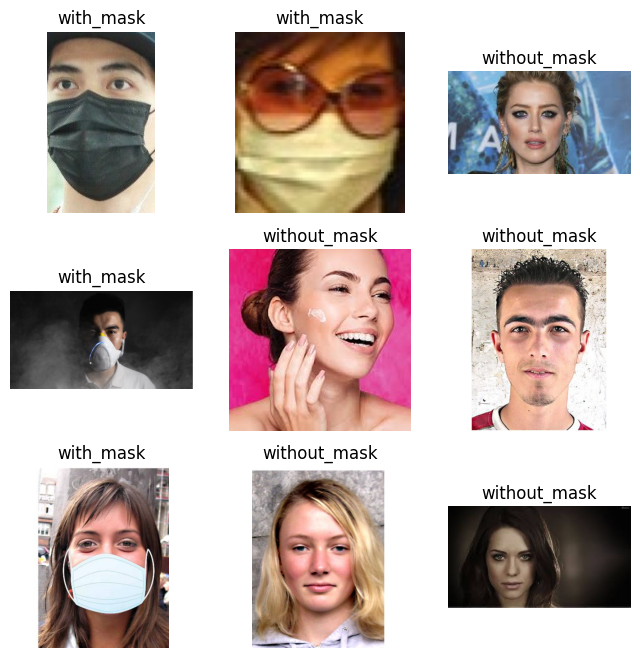

In [27]:
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
for i in range(3): # loop for  rows
    for j in range(3): # loop for columns
        idx = np.random.randint(len(df))
        img = cv2.imread(df['filepaths'][idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].set_title(df['labels'][idx])
        ax[i, j].axis('off')
plt.show()

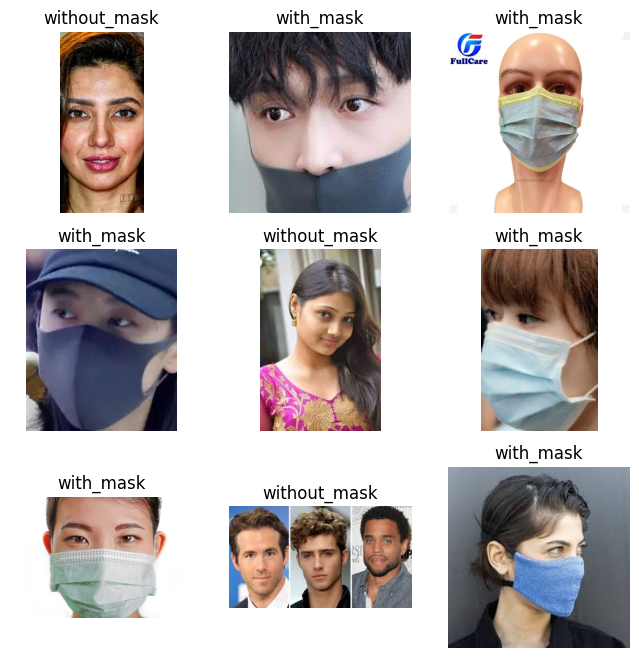

In [28]:
# show sample images
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
for i in range(3):
    for j in range(3):
        idx = np.random.randint(len(df))
        img = cv2.imread(df['filepaths'][idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].set_title(df['labels'][idx])
        ax[i, j].axis('off')
plt.show()

# split the data into train, validation, and test sets

In [29]:
X_train , dumy  = train_test_split(df, test_size=0.2, stratify=df['labels'], random_state=42)
X_val, X_test = train_test_split(dumy, test_size=0.5, stratify=dumy['labels'], random_state=42)

# ImageDataGenerator for data augmentation

In [30]:
imgGen =  ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [31]:
train_gen = imgGen.flow_from_dataframe(
    X_train,
    x_col = 'filepaths',
    y_col = 'labels',
    class_mode='binary' , 
    target_size=(128, 128),
    batch_size=32,
    color_mode='rgb',
) 
test_gen = imgGen.flow_from_dataframe(
    X_test,
    x_col = 'filepaths',
    y_col = 'labels',
    class_mode='binary' , 
    target_size=(128, 128),
    batch_size=32,
    color_mode='rgb',
) 
train_gen = imgGen.flow_from_dataframe(
     X_val,
    x_col = 'filepaths',
    y_col = 'labels',
    class_mode='binary' , 
    target_size=(128, 128),
    batch_size=32,
    color_mode='rgb',
) 

Found 6042 validated image filenames belonging to 2 classes.
Found 756 validated image filenames belonging to 2 classes.
Found 755 validated image filenames belonging to 2 classes.


In [32]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)), # 
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\Techno\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)

c:\Users\Techno\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.5949 - loss: 0.7076

c:\Users\Techno\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 864ms/step - accuracy: 0.6715 - loss: 0.6265 - val_accuracy: 0.8492 - val_loss: 0.3933
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 490ms/step - accuracy: 0.8305 - loss: 0.4122 - val_accuracy: 0.8942 - val_loss: 0.2896
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 709ms/step - accuracy: 0.8689 - loss: 0.3323 - val_accuracy: 0.8651 - val_loss: 0.3096
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - accuracy: 0.8728 - loss: 0.2938 - val_accuracy: 0.8823 - val_loss: 0.2781
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.8848 - loss: 0.2902 - val_accuracy: 0.8902 - val_loss: 0.2671
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step - accuracy: 0.8967 - loss: 0.2682 - val_accuracy: 0.8796 - val_loss: 0.3046
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 291ms/step - accuracy: 0.9099 - loss: 0.2495 - val_accuracy: 0.9021 - val_loss: 0.2798
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 290ms/step - accuracy: 0.9060 - loss: 0.2556 - val_accuracy: 0.8929 - v

In [39]:
test_loss, test_acc = model.evaluate(test_gen)
print(f" Test Accuracy: {test_acc * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

img_path = "data/with_mask/with_mask_3.jpg"  
img = image.load_img(img_path, target_size=(128,128))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = model.predict(img_array)

if pred[0][0] < 0.5:
    print("😷 With Mask")
else:
    print("🚫 Without Mask")


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.8902 - loss: 0.2528
 Test Accuracy: 89.02%
 Test Loss: 0.2528
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
😷 With Mask


In [40]:
model.save('plant_species_classifier.h5')

In [46]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [47]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)
model.evaluate(test_gen)


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7642 - loss: 0.4763

c:\Users\Techno\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 343ms/step - accuracy: 0.8781 - loss: 0.2662 - val_accuracy: 0.9577 - val_loss: 0.1023
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - accuracy: 0.9576 - loss: 0.1071 - val_accuracy: 0.9577 - val_loss: 0.1054
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.9748 - loss: 0.0705 - val_accuracy: 0.9828 - val_loss: 0.0667
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 264ms/step - accuracy: 0.9722 - loss: 0.0666 - val_accuracy: 0.9762 - val_loss: 0.0679
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.9828 - loss: 0.0531 - val_accuracy: 0.9828 - val_loss: 0.0580
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.9854 - loss: 0.0454 - val_accuracy: 0.9683 - val_loss: 0.0823
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step - accuracy: 0.9881 - loss: 0.0374 - val_accuracy: 0.9669 - val_loss: 0.0617
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 297ms/step - accuracy: 0.9907 - loss: 0.0267 - val_accuracy: 0.9841 - val

[0.0519251748919487, 0.9801587462425232]

In [48]:
model.evaluate(test_gen)

23/24 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.9801 - loss: 0.0407

c:\Users\Techno\AppData\Local\Programs\Python\Python313\Lib\site-packages\PIL\Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - accuracy: 0.9802 - loss: 0.0529


[0.052877653390169144, 0.9801587462425232]

In [49]:
test_loss, test_acc = model.evaluate(test_gen)
print(f" Test Accuracy: {test_acc * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")

img_path = "data/without_mask/without_mask_3.jpg"  
img = image.load_img(img_path, target_size=(128,128))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = model.predict(img_array)

if pred[0][0] < 0.5:
    print("😷 With Mask")
else:
    print("🚫 Without Mask")

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - accuracy: 0.9775 - loss: 0.0538
 Test Accuracy: 97.75%
 Test Loss: 0.0538
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 815ms/step
🚫 Without Mask


In [50]:
model.save('mask_model.h5')